## Using Albumentations Library for the Image Augmentations

In [2]:
# imports
import torch
import torchvision.transforms as transforms
import glob
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import time
import albumentations as A

from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [3]:
image_list = glob.glob('/home/jeng/classification/data/chairs/train/*/*.jpg')
print(len(image_list))

2118


In [4]:
# define pytorch transforms
transform = transforms.Compose([
     transforms.ToPILImage(),
     transforms.Resize((300, 300)),
     transforms.CenterCrop((100, 100)),
     transforms.RandomCrop((80, 80)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(-90, 90)),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])


In [5]:
# PyTorch image augmentation module
class PyTorchImageDataset(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')        
        image = np.asarray(image).astype(np.uint8)
        if self.transforms is not None:
            image = self.transforms(image)
            
        return torch.tensor(image, dtype=torch.float)

In [6]:
pytorch_dataset = PyTorchImageDataset(image_list=image_list, transforms=transform)
pytorch_dataloader = DataLoader(dataset=pytorch_dataset, batch_size=16, shuffle=True)

### Visualizing the Images

In [7]:
def show_img(img):
    plt.figure(figsize=(18,15))
    # unnormalize
    img = img / 2 + 0.5  
    npimg = img.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

/home/jeng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


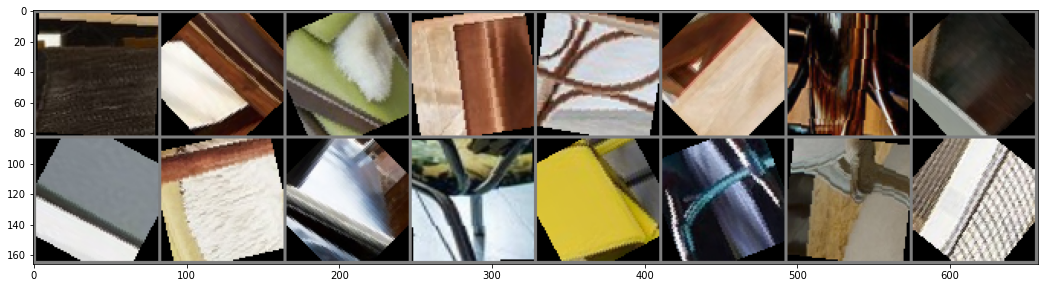

In [10]:
data = iter(pytorch_dataloader)
images = data.next()
# show images
show_img(torchvision.utils.make_grid(images))

In [11]:
start = time.time()
for i, data in enumerate(pytorch_dataloader):
    images = data
end = time.time()
time_spent = (end-start)/60
print(f"{time_spent:.3} minutes")

/home/jeng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.579 minutes


## Using Albumentations Library for the Image Augmentations

In [19]:
# custom dataset class for albumentations library
class AlbumentationImageDataset(Dataset):
    def __init__(self, image_list):
        self.image_list = image_list

        self.aug = A.Compose({
        A.Resize(200, 300),
        A.CenterCrop(80, 80),
        A.RandomCrop(50, 50),
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=(-90, 90)),
        A.VerticalFlip(p=0.5),
        A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        })
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
            
        return torch.tensor(image, dtype=torch.float)


In [20]:
alb_dataset = AlbumentationImageDataset(image_list=image_list)
alb_dataloader = DataLoader(dataset=alb_dataset, batch_size=16, shuffle=True)

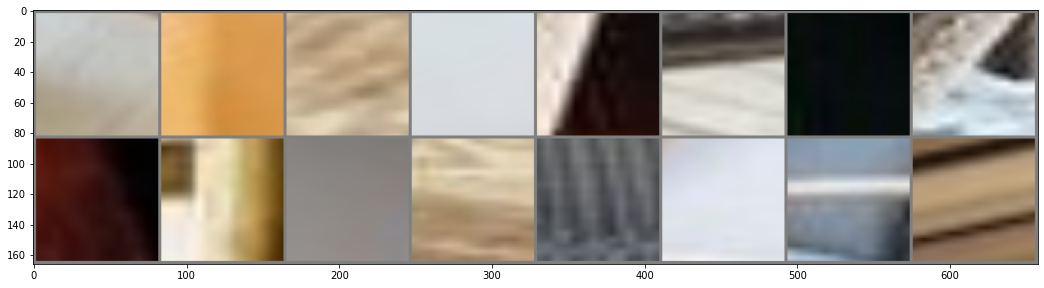

In [23]:
# show images
data = iter(alb_dataloader)
images = data.next()
show_img(torchvision.utils.make_grid(images))

In [24]:
start = time.time()
for i, data in enumerate(alb_dataloader):
    images = data
end = time.time()
time_spent = (end-start)/60
print(f"{time_spent:.3} minutes")

0.169 minutes
